# SALARY RANGE PREDICTION 

DATASET:

NYC JOB POSTINGS DATASET 

• Description: The dataset contains job attributes such as job titles, categories, locations, and other relevant details from job postings in NYC.
• Columns : Job attributes such as title, category, and location and salary ranges(from and to).
• Purpose : Analyzing factors influencing salary to build predictive models that can estimate salary ranges based on job attributes.
• Applications : Job market analysis, Insights into job trends and demands in NYC and Salary prediction for job seekers
• Analysis Tasks : EDA , Data preprocessing, ML model building, evaluation and model deployment. 
• Relevance : A practical dataset for real-world data science that can revolutionize talent management and recruitment processes. 

#### IMPORT LIBRARIES

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (eg. pd.read_csv)
import matplotlib.pyplot as plt # for specifying the axes tick format 
import seaborn as sns # for creating plots 
sns.set() # set aesthetic style of the plots 
from sklearn.model_selection import train_test_split # for splitting the data into training and testing sets 
from sklearn.linear_model import LinearRegression # for performing Linear Regression 
from sklearn.preprocessing import OneHotEncoder, StandardScaler # for preprocessing data - for encoding categorical variables     and scaling 
from sklearn.compose import ColumnTransformer # for applying transformations to specific columns of the data
from sklearn.tree import DecisionTreeRegressor # for decision tree regression 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # for model evaluation 
from sklearn.model_selection import cross_val_score # for cross - validating 
from sklearn.ensemble import RandomForestRegressor # for random forest regression

#### LOAD DATA FROM FILES

In [2]:
data_salary = pd.read_csv("Jobs_NYC_Postings.csv")

#### CREATE A COPY

In [3]:
data_uncleaned = data_salary.copy() 

## EXPLORATORY DATA ANALYSIS

In Exploratory Data Analysis -

1. Getting to know the Data (see the type of variables)
2. Data Preprocessing (Missing Values, Outliers, Encoding) 
3. Visualizations

### GETTING TO KNOW THE DATA

In [4]:
data_uncleaned.head()

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Classification,Title Code No,Level,Job Category,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,623668,DEPT OF HEALTH/MENTAL HYGIENE,External,1,"Research Analyst, IMAT, Bureau of Maternal Inf...",CITY RESEARCH SCIENTIST,Non-Competitive-5,21744,02,Constituent Services & Community Programs Heal...,...,**IMPORTANT NOTES TO ALL CANDIDATES: Please n...,Apply online with a cover letter to https://a1...,NaN,NaN,NaN,New York City residency is generally required ...,01/23/2024,22-MAY-2024,01/23/2024,03/04/2024
1,608193,DEPT OF DESIGN & CONSTRUCTION,Internal,1,Deputy Director,ADMINISTRATIVE PROJECT MANAGER,Competitive-1,8300B,00,"Policy, Research & Analysis Public Safety, Ins...",...,Authorization to work in the United States is ...,"For City Employees, please go to Employee Self...",35 Hours,"30-30 Thomson Avenue, LIC, NY 11101",NaN,New York City Residency is not required for th...,10/03/2023,NaN,11/29/2023,03/04/2024
2,625094,DEPT OF DESIGN & CONSTRUCTION,Internal,1,Senior Project Manager,ADMINISTRATIVE PROJECT MANAGER,Competitive-1,8300B,00,"Engineering, Architecture, & Planning",...,NaN,NaN,NaN,NaN,NaN,New York City Residency is not required for th...,02/01/2024,NaN,02/01/2024,03/04/2024
3,580593,DEPARTMENT OF TRANSPORTATION,External,1,Procurement Analyst 2,PROCUREMENT ANALYST,Competitive-1,12158,02,"Finance, Accounting, & Procurement",...,The City of New York is an inclusive equal opp...,Resumes may be submitted electronically using ...,9:00am â 5:00pm,To be determine.,NaN,New York City residency is generally required ...,04/04/2023,NaN,04/04/2023,03/04/2024
4,624937,DEPT OF HEALTH/MENTAL HYGIENE,External,1,"Deputy Director, HIV Planning Council, Divisio...",CITY RESEARCH SCIENTIST,Non-Competitive-5,21744,03,Constituent Services & Community Programs Heal...,...,NaN,Apply online with a cover letter to https://a1...,NaN,NaN,NaN,New York City residency is generally required ...,02/06/2024,05-JUN-2024,02/21/2024,03/04/2024


In [5]:
data_uncleaned.shape

(5120, 30)

In [6]:
data_uncleaned.dtypes.value_counts()

object     25
float64     3
int64       2
Name: count, dtype: int64

In [7]:
data_uncleaned.dtypes

Job ID                             int64
Agency                            object
Posting Type                      object
# Of Positions                     int64
Business Title                    object
Civil Service Title               object
Title Classification              object
Title Code No                     object
Level                             object
Job Category                      object
Full-Time/Part-Time indicator     object
Career Level                      object
Salary Range From                float64
Salary Range To                  float64
Salary Frequency                  object
Work Location                     object
Division/Work Unit                object
Job Description                   object
Minimum Qual Requirements         object
Preferred Skills                  object
Additional Information            object
To Apply                          object
Hours/Shift                       object
Work Location 1                   object
Recruitment Cont

In [8]:
data_uncleaned.columns

Index(['Job ID', 'Agency', 'Posting Type', '# Of Positions', 'Business Title',
       'Civil Service Title', 'Title Classification', 'Title Code No', 'Level',
       'Job Category', 'Full-Time/Part-Time indicator', 'Career Level',
       'Salary Range From', 'Salary Range To', 'Salary Frequency',
       'Work Location', 'Division/Work Unit', 'Job Description',
       'Minimum Qual Requirements', 'Preferred Skills',
       'Additional Information', 'To Apply', 'Hours/Shift', 'Work Location 1',
       'Recruitment Contact', 'Residency Requirement', 'Posting Date',
       'Post Until', 'Posting Updated', 'Process Date'],
      dtype='object')

#### Summary Statistics

In [9]:
data_uncleaned.describe()

,Job ID,# Of Positions,Salary Range From,Salary Range To,Recruitment Contact
count,5120.000000,5120.000000,5120.000000,5120.000000,0.0
mean,598721.366211,2.070898,64625.224123,89978.575734,NaN
std,28274.636161,5.799227,31378.516179,46732.299939,NaN
min,469953.000000,1.000000,0.000000,15.000000,NaN
25%,586358.000000,1.000000,51869.000000,64608.000000,NaN
50%,607060.000000,1.000000,62397.000000,85147.000000,NaN
75%,621404.000000,1.000000,80557.000000,113550.000000,NaN
max,628806.000000,150.000000,225000.000000,252165.000000,NaN


#### Check Variable's Data Type

It will give an idea about what type of data we are dealing with

In [10]:
data_uncleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5120 entries, 0 to 5119
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Job ID                         5120 non-null   int64  
 1   Agency                         5120 non-null   object 
 2   Posting Type                   5120 non-null   object 
 3   # Of Positions                 5120 non-null   int64  
 4   Business Title                 5120 non-null   object 
 5   Civil Service Title            5120 non-null   object 
 6   Title Classification           5120 non-null   object 
 7   Title Code No                  5120 non-null   object 
 8   Level                          5120 non-null   object 
 9   Job Category                   5120 non-null   object 
 10  Full-Time/Part-Time indicator  5003 non-null   object 
 11  Career Level                   5120 non-null   object 
 12  Salary Range From              5120 non-null   f

### DATA PREPROCESSING

#### Checking Missing Values 

In [11]:
data_uncleaned.isnull().sum()

Job ID                              0
Agency                              0
Posting Type                        0
# Of Positions                      0
Business Title                      0
Civil Service Title                 0
Title Classification                0
Title Code No                       0
Level                               0
Job Category                        0
Full-Time/Part-Time indicator     117
Career Level                        0
Salary Range From                   0
Salary Range To                     0
Salary Frequency                    0
Work Location                       0
Division/Work Unit                  0
Job Description                     0
Minimum Qual Requirements          43
Preferred Skills                 1219
Additional Information           1862
To Apply                          426
Hours/Shift                      3210
Work Location 1                  3229
Recruitment Contact              5120
Residency Requirement               0
Posting Date

In [ ]:
(data_uncleaned.isnull().sum())*100/len(data_uncleaned) #Percentage of missing values 

There are multiple methods we can use depending on whether the data is missing at random, the proportion of missing values, and the machine learning model we plan to use.

The most commonly used methods for dealing with missing data

Using algorithms like XGBoost to ignore missing data
Remove missing data by row or column
Filling in missing data statistically
Filling missing data with other methods
Prediction of missing values

we drop columns that are not needed - here 
Recruitment contact doesnot contain anything, 
post unit column has 70% missing values,
work location 1 column is a duplicate of work location and 
hours/shift has huge number of unique categorical values as well as challenging to fill the missing values and encode
so we omit these columns
If a significant portion of the data in a particular column is missing keeping the column could introduce bias or noise into analysis.

In [12]:
columns_to_drop = ['Recruitment Contact', 'Post Until', 'Hours/Shift', 'Work Location 1']
data_uncleaned.drop(columns_to_drop, axis=1, inplace=True)

#### Filling Missing Data Statistically - using Mode

In [13]:
data_uncleaned['Preferred Skills'] = data_uncleaned['Preferred Skills'].fillna(data_uncleaned['Preferred Skills'].mode()[0])
data_uncleaned ['FT/PT'] = data_uncleaned ['Full-Time/Part-Time indicator'].fillna(data_uncleaned['Full-Time/Part-Time indicator'].mode()[0]) 
data_uncleaned['Additional Information'] = data_uncleaned['Additional Information'].fillna(data_uncleaned['Additional Information'].mode()[0])
data_uncleaned['To Apply'] = data_uncleaned['To Apply'] . fillna(data_uncleaned [ 'To Apply'].mode()[0])
data_uncleaned['Minimum Qual'] = data_uncleaned['Minimum Qual Requirements'] . fillna(data_uncleaned ['Minimum Qual Requirements']. mode() [0])

In [14]:
(data_uncleaned.isnull().sum())*100/len(data_uncleaned)

Job ID                           0.000000
Agency                           0.000000
Posting Type                     0.000000
# Of Positions                   0.000000
Business Title                   0.000000
Civil Service Title              0.000000
Title Classification             0.000000
Title Code No                    0.000000
Level                            0.000000
Job Category                     0.000000
Full-Time/Part-Time indicator    2.285156
Career Level                     0.000000
Salary Range From                0.000000
Salary Range To                  0.000000
Salary Frequency                 0.000000
Work Location                    0.000000
Division/Work Unit               0.000000
Job Description                  0.000000
Minimum Qual Requirements        0.839844
Preferred Skills                 0.000000
Additional Information           0.000000
To Apply                         0.000000
Residency Requirement            0.000000
Posting Date                     0

#### Outliers 

In [15]:
# Function to identify outliers using Z-score
def identify_outliers_zscore(df, threshold=3):
    z_scores = np.abs((df - df.mean()) / df.std())
    outliers = (z_scores > threshold).any(axis=1)
    return outliers

In [16]:
# Identify and remove outliers in the numerical columns
numeric_columns = ['Salary Range From', 'Salary Range To', '# Of Positions']
outliers = identify_outliers_zscore(data_uncleaned[numeric_columns])
data = data_uncleaned[~outliers]

In [17]:
data.describe()

,Job ID,# Of Positions,Salary Range From,Salary Range To
count,4981.000000,4981.000000,4981.000000,4981.000000
mean,598597.681791,1.626380,62798.710048,88174.355952
std,28357.137735,1.972588,27395.397594,44198.818990
min,469953.000000,1.000000,0.000000,15.000000
25%,586463.000000,1.000000,51816.000000,64608.000000
50%,607036.000000,1.000000,62370.000000,85147.000000
75%,621372.000000,1.000000,80000.000000,111917.000000
max,628806.000000,19.000000,150000.000000,223761.000000


## VISUALIZATIONS 

In [18]:
# Univariate Analysis - Numerical Variables
numerical_cols = ['Salary Range From', 'Salary Range To']

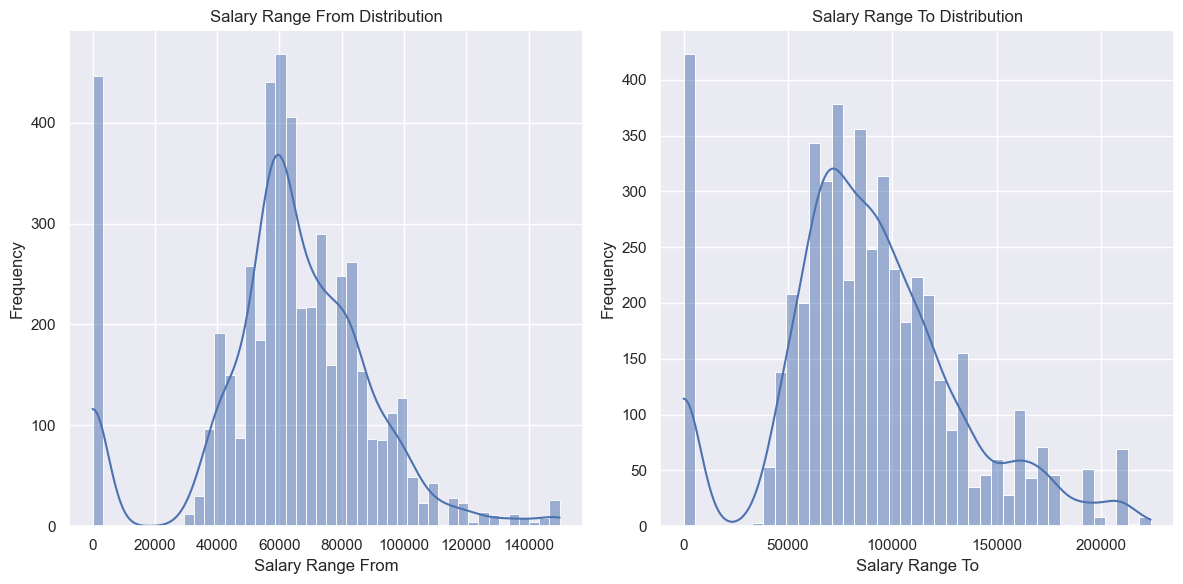

In [19]:
# Histograms for numerical variables
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols, 1):  #Use a loop to iterate through each numerical column
    plt.subplot(1, len(numerical_cols), i)  # Inside the loop, create subplots - This places each histogram in a separate subplot within a row 
    sns.histplot(data[col], kde=True)
    plt.title(f'{col} Distribution')  # set labels and titles 
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## TRAIN TEST SPLIT

In [20]:
# Since'salary range from' and 'salary range to' are the target variables
X = data.drop(columns=['Salary Range From', 'Salary Range To'])
y_from = data['Salary Range From']
y_to = data['Salary Range To']


In [21]:
X_train, X_test, y_train_from, y_test_from = train_test_split(X, y_from, test_size=0.2, random_state=42)
_, _, y_train_to, y_test_to = train_test_split(X, y_to, test_size=0.2, random_state=42)

## DATA TRANSFORMATION

In [22]:
categorical_features = ['Job ID', 'Agency', 'Posting Type', 'Business Title', 'Civil Service Title',
                        'Title Classification', 'Level', 'Job Category', 'Full-Time/Part-Time indicator',
                        'Career Level', 'Salary Frequency', 'Work Location', 'Division/Work Unit',
                         'Residency Requirement']
numeric_features = ['# Of Positions']

In [23]:
numeric_transformer = StandardScaler()  #Initializes a transformer that standardizes numerical features by removing the mean and scaling to unit variance.

categorical_transformer = OneHotEncoder(handle_unknown='ignore') #Initializes a transformer that encodes categorical features 

In [24]:
# preprocessor applies StandardScaler to numerical features and OneHotEncoder to categorical features.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [25]:
# ApplY the preprocessing transformations to the training data /testing data

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

## SIMPLE LINEAR REGRESSION 

In [26]:
# Creating an instance of a linear regression model
model_from = LinearRegression()
model_to = LinearRegression()

In [27]:
# Fitting the model
model_from.fit(X_train_preprocessed, y_train_from)
model_to.fit(X_train_preprocessed, y_train_to)

LinearRegression()

In [28]:
# Predicting the model 
y_pred_from_lr = model_from.predict(X_test_preprocessed)
y_pred_to_lr = model_to.predict(X_test_preprocessed)

#### RMSE

In [29]:
# Calculating RMSE between actual and predicted values 
rmse_from_lr = mean_squared_error(y_test_from, y_pred_from_lr, squared=False)
rmse_to_lr = mean_squared_error(y_test_to, y_pred_to_lr, squared=False)

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [30]:
print(f"RMSE for Salary Range From (Simple Linear Regression): {rmse_from_lr:.2f}")
print(f"RMSE for Salary Range To (Simple Linear Regression): {rmse_to_lr:.2f}")

RMSE for Salary Range From (Simple Linear Regression): 4284.57
RMSE for Salary Range To (Simple Linear Regression): 6652.99


#### MAE

In [31]:
# Calculate MAE between actual and predicted values 
mae_from_lr = mean_absolute_error(y_test_from, y_pred_from_lr)
mae_to_lr = mean_absolute_error(y_test_to, y_pred_to_lr)

In [32]:
print(f"MAE for Salary Range From (LR): {mae_from_lr:.2f}")
print(f"MAE for Salary Range To (LR): {mae_to_lr:.2f}")

MAE for Salary Range From (LR): 1362.28
MAE for Salary Range To (LR): 2319.27


#### R2

In [33]:
# Calculate R^2 Score bewteen actual and predicted values 
r2_from_lr = r2_score(y_test_from, y_pred_from_lr)
r2_to_lr = r2_score(y_test_to, y_pred_to_lr)

In [34]:
print(f"R^2 Score for Salary Range From (LR): {r2_from_lr:.2f}")
print(f"R^2 Score for Salary Range To (LR): {r2_to_lr:.2f}")

R^2 Score for Salary Range From (LR): 0.97
R^2 Score for Salary Range To (LR): 0.98


#### Cross Validation

In [35]:
# Perform cross-validation and calculate RMSE for 'Salary Range From'
cross_val_scores_from_lr = cross_val_score(LinearRegression(), X_train_preprocessed, y_train_from, cv=5, scoring='neg_mean_squared_error')
cross_val_rmse_from_lr = np.sqrt(-cross_val_scores_from_lr.mean())
print("Cross-Validated RMSE for Linear Regression (Salary Range From):", cross_val_rmse_from_lr)

Cross-Validated RMSE for Linear Regression (Salary Range From): 6558.0287503931495


In [36]:
# For Salary Range To
cross_val_scores_to_lr = cross_val_score(LinearRegression(), X_train_preprocessed, y_train_to, cv=5, scoring='neg_mean_squared_error')
cross_val_rmse_to_lr = np.sqrt(-cross_val_scores_to_lr.mean())
print("Cross-Validated RMSE for Salary Range To (Linear Regression):", cross_val_rmse_to_lr)

Cross-Validated RMSE for Salary Range To (Linear Regression): 9112.839017610582


### Actual Vs Predicted 

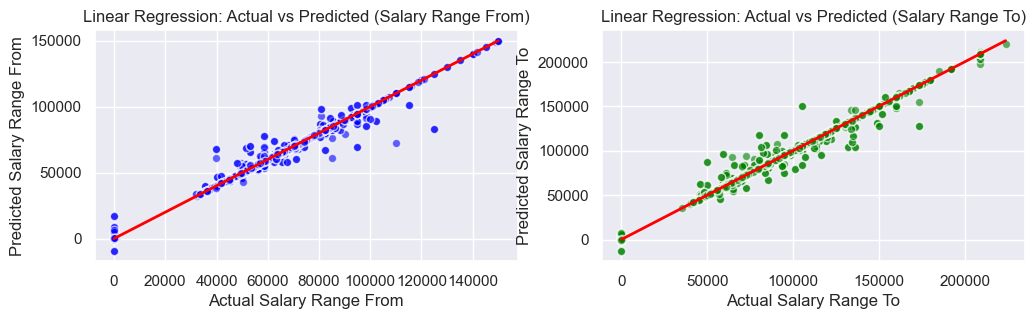

In [37]:
#Plot for 'Salary Range From'
plt.figure(figsize=(12,3))

plt.subplot(1, 2, 1)
plt.scatter(y_test_from, y_pred_from_lr, color='blue', edgecolor='w', alpha=0.6)
plt.plot([y_test_from.min(), y_test_from.max()], [y_test_from.min(), y_test_from.max()], color='red', linewidth=2)
plt.xlabel('Actual Salary Range From')
plt.ylabel('Predicted Salary Range From')
plt.title('Linear Regression: Actual vs Predicted (Salary Range From)')
plt.grid(True)

# Plot for 'Salary Range To'
plt.subplot(1, 2, 2)
plt.scatter(y_test_to, y_pred_to_lr, color='green', edgecolor='w', alpha=0.6)
plt.plot([y_test_to.min(), y_test_to.max()], [y_test_to.min(), y_test_to.max()], color='red', linewidth=2)
plt.xlabel('Actual Salary Range To')
plt.ylabel('Predicted Salary Range To')
plt.title('Linear Regression: Actual vs Predicted (Salary Range To)')
plt.grid(True)

Summary: 

• The linear regression model used to predict both "Salary Range From" and "Salary Range To" shows a decent fit, with the actual values closely aligning with the predicted values.
• Both scatter plots indicate that while the model is not perfect (there is some spread of points around the red line), it generally makes accurate predictions.
• The red line in both plots helps visualize how well the model's predictions align with the actual values, and in both cases, the points are clustered around this line, indicating a good model performance.

The points are closely aligned along the red diagonal line, indicating a good fit
The predicted values span a wide range, which is good. 

### Residual Plots 

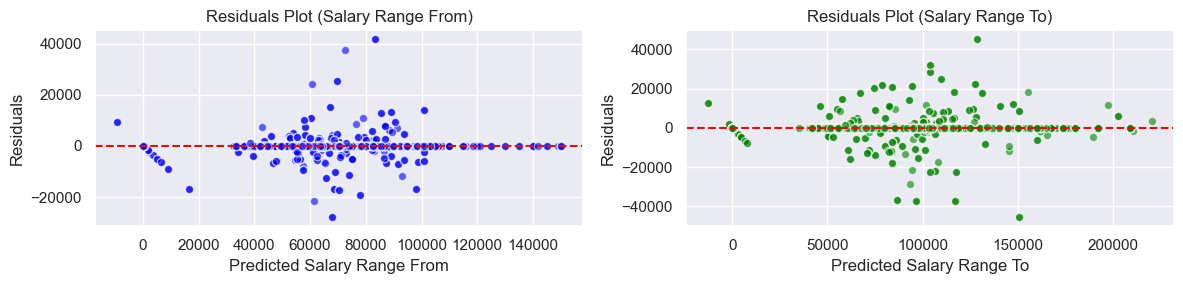

In [38]:
# Residual plots for Linear Regression
plt.figure(figsize=(12,3))

plt.subplot(1, 2, 1)
plt.scatter(y_pred_from_lr, y_test_from - y_pred_from_lr, color='blue', edgecolor='w', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Salary Range From')
plt.ylabel('Residuals')
plt.title('Residuals Plot (Salary Range From)')

plt.subplot(1, 2, 2)
plt.scatter(y_pred_to_lr, y_test_to - y_pred_to_lr, color='green', edgecolor='w', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Salary Range To')
plt.ylabel('Residuals')
plt.title('Residuals Plot (Salary Range To)')

plt.tight_layout()
plt.show()

Model Performance:

• The residuals for both salary ranges are centered around zero, which is good in a well-fitted linear regression model.
• The lack of a clear pattern in the residual plots indicates that the linear regression model is appropriately specified (i.e., the model does not show clear signs of misspecification like non-linearity or heteroscedasticity).

## DECISION TREES

In [39]:
# Creating an instance of a model
model_from = DecisionTreeRegressor(random_state=42)
model_to = DecisionTreeRegressor(random_state=42)

In [40]:
#Train the models
model_from.fit(X_train_preprocessed, y_train_from)
model_to.fit(X_train_preprocessed, y_train_to)

DecisionTreeRegressor(random_state=42)

In [41]:
# Predictions
y_pred_from = model_from.predict(X_test_preprocessed)
y_pred_to = model_to.predict(X_test_preprocessed)

In [42]:
# Calculate RMSE (Root Mean Squared Error)
rmse_from_dt = mean_squared_error(y_test_from, y_pred_from, squared=False)
rmse_to_dt = mean_squared_error(y_test_to, y_pred_to, squared=False)

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [43]:
print(f"RMSE for Salary Range From (Decision Tree): {rmse_from_dt:.2f}")
print(f"RMSE for Salary Range To (Decision Tree): {rmse_to_dt:.2f}")

RMSE for Salary Range From (Decision Tree): 4399.50
RMSE for Salary Range To (Decision Tree): 8566.04


In [44]:
# Calculate MAE
mae_from_dt = mean_absolute_error(y_test_from, y_pred_from)
mae_to_dt = mean_absolute_error(y_test_to, y_pred_to)


In [45]:
print(f"MAE for Salary Range From: {mae_from_dt:.2f}")
print(f"MAE for Salary Range To: {mae_to_dt:.2f}")


MAE for Salary Range From: 925.39
MAE for Salary Range To: 2552.95


In [46]:
# Calculate R^2 Score
r2_from_dt = r2_score(y_test_from, y_pred_from)
r2_to_dt = r2_score(y_test_to, y_pred_to)

In [47]:
print(f"R^2 Score for Salary Range From: {r2_from_dt:.2f}")
print(f"R^2 Score for Salary Range To: {r2_to_dt:.2f}")

R^2 Score for Salary Range From: 0.97
R^2 Score for Salary Range To: 0.96


In [48]:
# Perform cross-validation and calculate RMSE for 'Salary Range From'
cross_val_scores_from_dt = cross_val_score(model_from, X_train_preprocessed, y_train_from, cv=5, scoring='neg_mean_squared_error')
cross_val_rmse_from_dt = np.sqrt(-cross_val_scores_from_dt.mean())
print("Cross-Validated RMSE for Decision Tree (Salary Range From):", cross_val_rmse_from_dt)

Cross-Validated RMSE for Decision Tree (Salary Range From): 7949.468318044757


In [49]:
# Perform cross-validation and calculate RMSE for 'Salary Range To'
cross_val_scores_to_dt = cross_val_score(model_to, X_train_preprocessed, y_train_to, cv=5, scoring='neg_mean_squared_error')
cross_val_rmse_to_dt = np.sqrt(-cross_val_scores_to_dt.mean())
print("Cross-Validated RMSE for Decision Tree (Salary Range To):", cross_val_rmse_to_dt)

Cross-Validated RMSE for Decision Tree (Salary Range To): 11606.112270441063


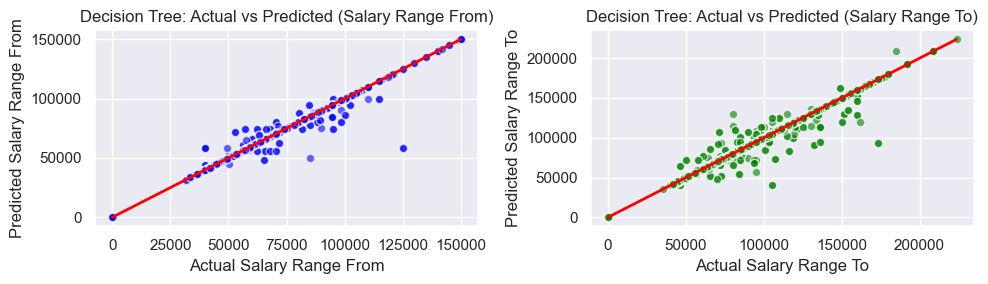

In [50]:
# Actual Vs Predicted 

plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
plt.scatter(y_test_from, y_pred_from, color='blue', edgecolor='w', alpha=0.6)
plt.plot([y_test_from.min(), y_test_from.max()], [y_test_from.min(), y_test_from.max()], color='red', linewidth=2)
plt.xlabel('Actual Salary Range From')
plt.ylabel('Predicted Salary Range From')
plt.title('Decision Tree: Actual vs Predicted (Salary Range From)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(y_test_to, y_pred_to, color='green', edgecolor='w', alpha=0.6)
plt.plot([y_test_to.min(), y_test_to.max()], [y_test_to.min(), y_test_to.max()], color='red', linewidth=2)
plt.xlabel('Actual Salary Range To')
plt.ylabel('Predicted Salary Range To')
plt.title('Decision Tree: Actual vs Predicted (Salary Range To)')
plt.grid(True)

plt.tight_layout()
plt.show()

Model Performance:

• The Decision Tree model used to predict both "Salary Range From" and "Salary Range To" shows a good fit, with the actual values closely aligning with the predicted values.
• Both scatter plots indicate that while the model is not perfect (there are some deviations), it generally makes accurate predictions.
• The red line in both plots helps visualize how well the model's predictions align with the actual values. In both cases, the points are clustered around this line, indicating good model performance.

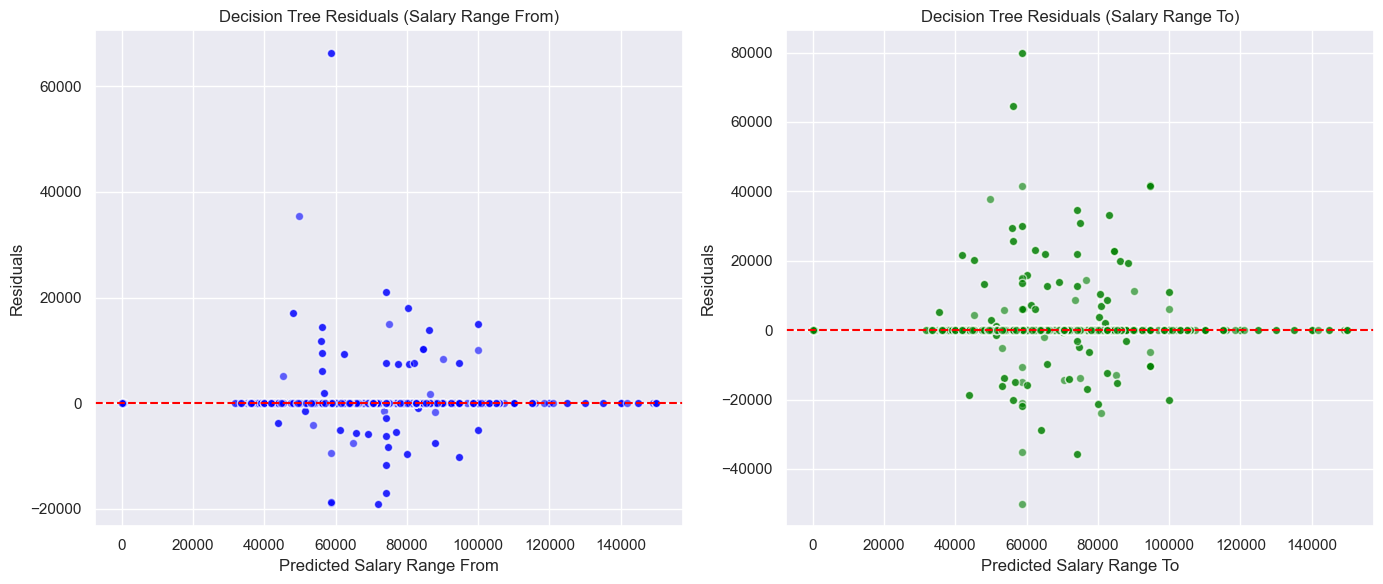

In [51]:
# Residual plots for Decision Tree
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_pred_from, y_test_from - y_pred_from, color='blue', edgecolor='w', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Salary Range From')
plt.ylabel('Residuals')
plt.title('Decision Tree Residuals (Salary Range From)')

plt.subplot(1, 2, 2)
plt.scatter(y_pred_from, y_test_to - y_pred_to, color='green', edgecolor='w', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Salary Range To')
plt.ylabel('Residuals')
plt.title('Decision Tree Residuals (Salary Range To)')

plt.tight_layout()
plt.show()

## RANDOM FOREST 

In [52]:
# Define and train the Random Forest models
model_from = RandomForestRegressor(random_state=42)
model_to = RandomForestRegressor(random_state=42)

In [53]:
model_from.fit(X_train_preprocessed, y_train_from)
model_to.fit(X_train_preprocessed, y_train_to)

RandomForestRegressor(random_state=42)

In [54]:
# Predictions
y_pred_from = model_from.predict(X_test_preprocessed)
y_pred_to = model_to.predict(X_test_preprocessed)

In [55]:
# Calculate RMSE (Root Mean Squared Error)
rmse_from_rf = mean_squared_error(y_test_from, y_pred_from, squared=False)
rmse_to_rf = mean_squared_error(y_test_to, y_pred_to, squared=False)

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [56]:
print(f"RMSE for Salary Range From (Random Forest): {rmse_from_rf:.2f}")
print(f"RMSE for Salary Range To (Random Forest): {rmse_to_rf:.2f}")

RMSE for Salary Range From (Random Forest): 6032.76
RMSE for Salary Range To (Random Forest): 9455.18


In [57]:
# Calculate MAE
mae_from_rf = mean_absolute_error(y_test_from, y_pred_from)
mae_to_rf = mean_absolute_error(y_test_to, y_pred_to)

In [58]:
print(f"MAE for Salary Range From: {mae_from_rf:.2f}")
print(f"MAE for Salary Range To: {mae_to_rf:.2f}")

MAE for Salary Range From: 2706.35
MAE for Salary Range To: 5128.31


In [59]:
# Calculate R^2 Score
r2_from_rf = r2_score(y_test_from, y_pred_from)
r2_to_rf = r2_score(y_test_to, y_pred_to)

In [60]:
print(f"R^2 Score for Salary Range From: {r2_from_rf:.2f}")
print(f"R^2 Score for Salary Range To: {r2_to_rf:.2f}")

R^2 Score for Salary Range From: 0.95
R^2 Score for Salary Range To: 0.95


In [61]:
cross_val_scores_from_rf = cross_val_score(model_from, X_train_preprocessed, y_train_from, cv=5, scoring='neg_mean_squared_error')
cross_val_rmse_from_rf = np.sqrt(-cross_val_scores_from_rf.mean())
print("Cross-Validated RMSE for Random Forest (Salary Range From):", cross_val_rmse_from_rf)

Cross-Validated RMSE for Random Forest (Salary Range From): 7467.52731817686


In [62]:
# Perform cross-validation and calculate RMSE for 'Salary Range To'
cross_val_scores_to_rf = cross_val_score(model_to, X_train_preprocessed, y_train_to, cv=5, scoring='neg_mean_squared_error')
cross_val_rmse_to_rf = np.sqrt(-cross_val_scores_to_rf.mean())
print("Cross-Validated RMSE for Random Forest (Salary Range To):", cross_val_rmse_to_rf)

Cross-Validated RMSE for Random Forest (Salary Range To): 10988.70886270945


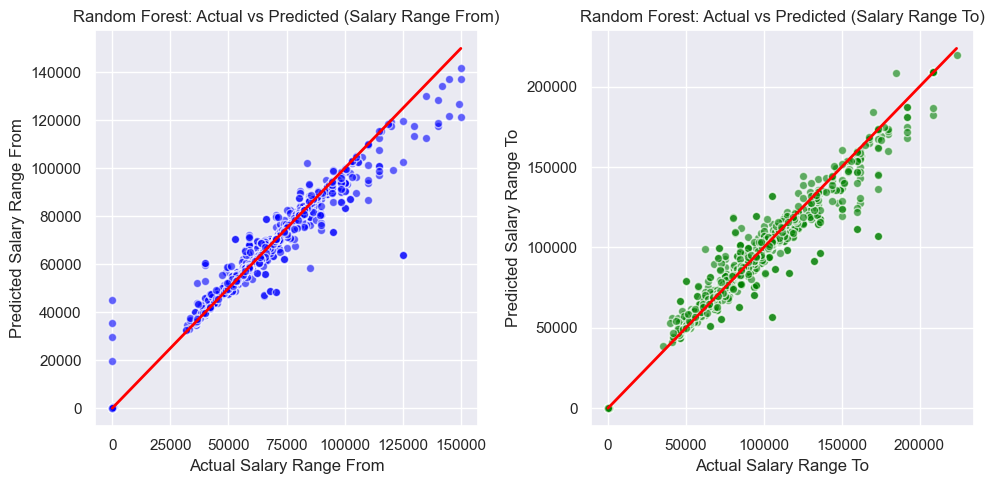

In [63]:
# Actual Vs Predicted 

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test_from, y_pred_from, color='blue', edgecolor='w', alpha=0.6)
plt.plot([y_test_from.min(), y_test_from.max()], [y_test_from.min(), y_test_from.max()], color='red', linewidth=2)
plt.xlabel('Actual Salary Range From')
plt.ylabel('Predicted Salary Range From')
plt.title('Random Forest: Actual vs Predicted (Salary Range From)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(y_test_to, y_pred_to, color='green', edgecolor='w', alpha=0.6)
plt.plot([y_test_to.min(), y_test_to.max()], [y_test_to.min(), y_test_to.max()], color='red', linewidth=2)
plt.xlabel('Actual Salary Range To')
plt.ylabel('Predicted Salary Range To')
plt.title('Random Forest: Actual vs Predicted (Salary Range To)')
plt.grid(True)

plt.tight_layout()
plt.show()

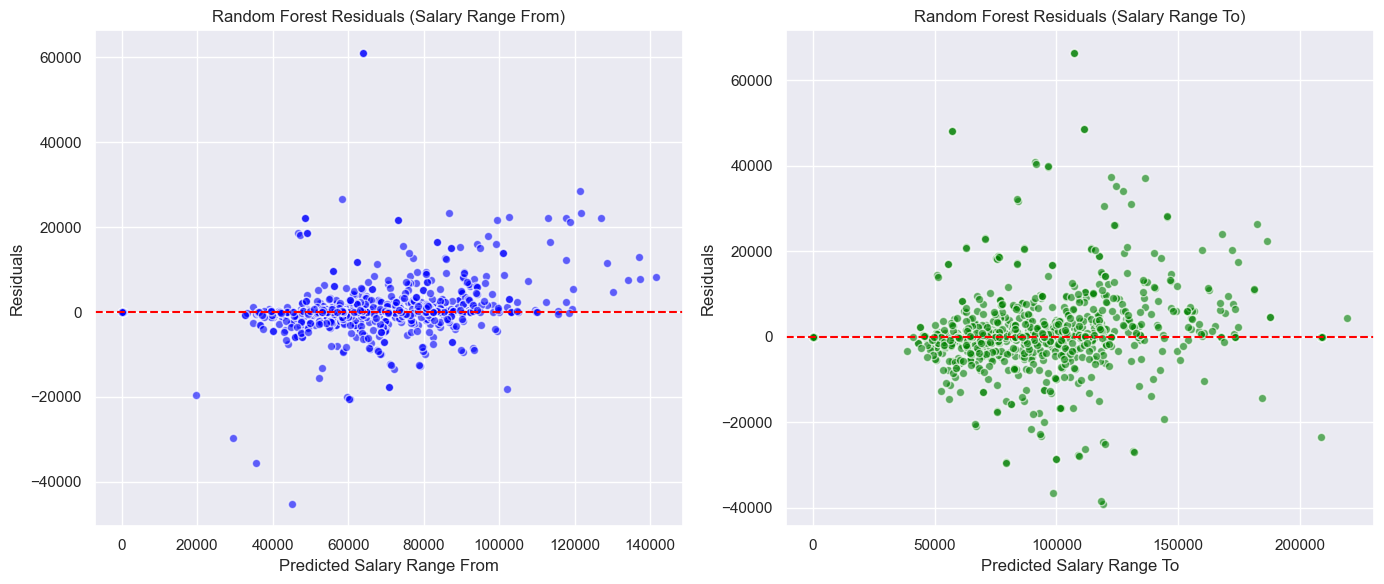

In [64]:
# Residual plots for Random Forest
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_pred_from, y_test_from - y_pred_from, color='blue', edgecolor='w', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Salary Range From')
plt.ylabel('Residuals')
plt.title('Random Forest Residuals (Salary Range From)')

plt.subplot(1, 2, 2)
plt.scatter(y_pred_to, y_test_to - y_pred_to, color='green', edgecolor='w', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Salary Range To')
plt.ylabel('Residuals')
plt.title('Random Forest Residuals (Salary Range To)')

plt.tight_layout()
plt.show()

## MODEL COMPARISON  

In [65]:
results = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'RMSE From': [rmse_from_lr, rmse_from_dt, rmse_from_rf],
    'RMSE To': [rmse_to_lr, rmse_to_dt, rmse_to_rf],
    'MAE From': [mae_from_lr, mae_from_dt, mae_from_rf],
    'MAE To': [mae_to_lr, mae_to_dt, mae_to_rf],
    'R^2 From': [r2_from_lr, r2_from_dt, r2_from_rf],
    'R^2 To': [r2_to_lr, r2_to_dt, r2_to_rf],
    'Cross-Validation From': [cross_val_rmse_from_lr,cross_val_rmse_from_dt,cross_val_rmse_from_rf],
    'Cross-Validation To': [cross_val_rmse_to_lr,cross_val_rmse_to_dt,cross_val_rmse_to_rf]
}

In [66]:
results_df = pd.DataFrame(results)
results_df

,Model,RMSE From,RMSE To,MAE From,MAE To,R^2 From,R^2 To,Cross-Validation From,Cross-Validation To
0,Linear Regression,4284.574361,6652.988798,1362.279638,2319.269388,0.974883,0.975462,6558.028750,9112.839018
1,Decision Tree,4399.502382,8566.037846,925.394842,2552.945692,0.973518,0.959321,7949.468318,11606.112270
2,Random Forest,6032.764085,9455.175938,2706.350722,5128.308517,0.950206,0.950438,7467.527318,10988.708863


## CONCLUSION 

RMSE (Root Mean Square Error):

• Linear Regression has the lowest RMSE range (4284 to 6652), suggesting it provides the most accurate predictions in terms of minimizing overall prediction errors.
• Decision Tree and Random Forest have higher RMSE ranges, indicating they produce more significant prediction errors compared to Linear Regression. 

MAE (Mean Absolute Error):

• Linear Regression has a slightly higher MAE range (1362 to 2319) compared to Decision Tree (925 to 2552). 
• This indicates that on average, the Decision Tree model's predictions are slightly closer to the actual values.
Random Forest has the highest MAE range, showing that it has the highest average prediction error among the three models.

R² (Coefficient of Determination):

• Linear Regression shows the highest R² range (0.974 to 0.9754), indicating it explains the highest proportion of the variance in the target variable.
• Decision Tree and Random Forest have slightly lower R² ranges, suggesting they explain slightly less variance in the data.

Cross-Validation:

• Linear Regression has the lowest range for cross-validation errors (6558 to 9112), which implies it performs more consistently across different subsets of the data.
• Decision Tree and Random Forest have higher cross-validation error ranges, indicating less stability and consistency compared to Linear Regression.

Conclusion:
Based on the performance metrics:

• Linear Regression stands out as the best model for predicting salary. It has the lowest RMSE and highest R² values, indicating it provides the most accurate and consistent predictions with the highest explanatory power for the variance in the target variable.
• Although the Decision Tree model has a slightly lower MAE, its higher RMSE and lower R² values compared to Linear Regression suggest it is less effective in terms of overall predictive performance.
• The Random Forest model, despite being a more complex ensemble method, shows higher errors (both RMSE and MAE) and lower R² compared to Linear Regression, indicating it is less suitable for this particular problem.

Therefore, Simple Linear Regression is the recommended model due to its superior performance in minimizing prediction errors and explaining variance in the target variable.
